In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [0]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers

In [3]:


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
print('Training data')
print('Shape of train_images:' ,train_images.shape)
print('Shape of train_labels:' ,train_labels.shape)
print('Shape of test_images:' ,test_images.shape)
print('Shape of test_labels:', test_labels.shape)


Training data
Shape of train_images: (50000, 32, 32, 3)
Shape of train_labels: (50000, 1)
Shape of test_images: (10000, 32, 32, 3)
Shape of test_labels: (10000, 1)


In [0]:

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
test_labels.shape

(10000, 10)

In [20]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [0]:
import numpy as np
yTest_original=np.argmax(test_labels,axis=1)

In [24]:
yTest_original

array([3, 8, 8, ..., 5, 1, 7])

In [6]:


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [8]:


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [9]:
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/50





40000/40000 [==============================] - 11s 263us/step - loss: 1.9470 - acc: 0.2938 - val_loss: 1.7444 - val_acc: 0.3617
Epoch 2/50
40000/40000 [==============================] - 4s 95us/step - loss: 1.6630 - acc: 0.3994 - val_loss: 1.6071 - val_acc: 0.4121
Epoch 3/50
40000/40000 [==============================] - 4s 95us/step - loss: 1.5385 - acc: 0.4431 - val_loss: 1.5013 - val_acc: 0.4578
Epoch 4/50
40000/40000 [==============================] - 4s 96us/step - loss: 1.4593 - acc: 0.4773 - val_loss: 1.4481 - val_acc: 0.4861
Epoch 5/50
40000/40000 [==============================] - 4s 96us/step - loss: 1.3993 - acc: 0.5027 - val_loss: 1.3859 - val_acc: 0.5115
Epoch 6/50
40000/40000 [==============================] - 4s 94us/step - loss: 1.3475 - acc: 0.5195 - val_loss: 1.3237 - val_acc: 0.5374
Epoch 7/50
40000/40000 [

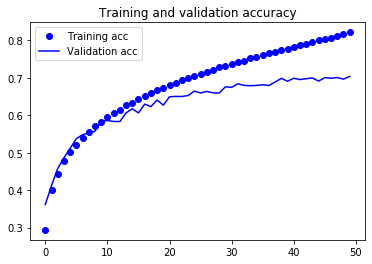

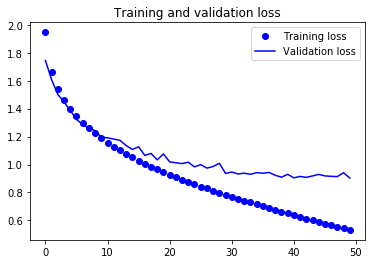

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 61us/step


In [12]:
test_acc

0.6995

In [0]:
yPred = model.predict_classes(test_images)

In [15]:
yPred

array([3, 1, 8, ..., 5, 4, 7])

In [0]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_true=yTest_original, y_pred=yPred))


              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.81      0.78      0.80      1000
           2       0.60      0.61      0.60      1000
           3       0.50      0.60      0.55      1000
           4       0.75      0.54      0.62      1000
           5       0.61      0.58      0.60      1000
           6       0.74      0.80      0.77      1000
           7       0.74      0.73      0.73      1000
           8       0.82      0.81      0.82      1000
           9       0.78      0.77      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [26]:
print(confusion_matrix(y_true=yTest_original, y_pred=yPred))


[[781  20  42  25  10   9  11   9  65  28]
 [ 31 783   9  15   2   7  20   8  30  95]
 [ 73   8 608  87  41  62  62  32  12  15]
 [ 26  11  71 602  31 131  59  36  16  17]
 [ 31   3 116  91 535  42  74  85  16   7]
 [ 26   6  50 210  32 578  27  57   3  11]
 [ 12   3  50  67  16  30 797  13   7   5]
 [ 35   1  38  55  44  65  12 730   3  17]
 [ 67  39  16  21   5   8   4   2 815  23]
 [ 39  89  14  21   1   8  12  18  32 766]]
